# Глубинное обучение, ИИ ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

### Оценивание и штрафы

Максимально допустимая оценка за работу без бонусов — 10 баллов. Сдавать задание после указанного срока жесткого дедлайна нельзя.

Сдача работы после мягкого дедлайна штрафуется ступенчато, -1 балл в сутки. Один раз за модуль студентам предоставляется возможность использовать отсрочку и сдать в жесткий дедлайн без штрафа.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Использование генеративных моделей допустимо на следующих условиях:
- Количество кода, написанное генеративными моделями, не превышает 30%
- Указана модель, использованная для генерации, а также промпт
- В конце работы необходимо описать свой опыт использования генеративного ИИ для решения данного домашнего задания. Укажите как часто Вам приходилось исправлять код своими руками или просить модель что-то исправить. Было ли это быстрее, чем написать код самим? 

В случае невыполнения этих требований работа не оценивается и оценка за неё не превышает 0 баллов.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm.notebook import tqdm

plt.rcParams.update({"font.size": 16})
sns.set_style("whitegrid")
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [2]:
df = pd.read_csv("data.txt.zip", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

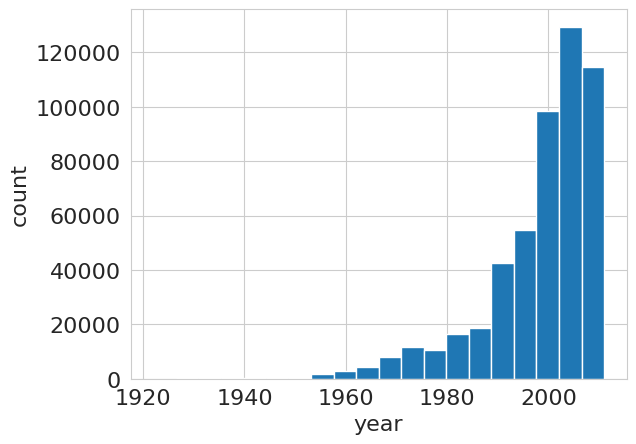

Range: 1922 - 2011
Unique values: 89


In [4]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel("year")
plt.ylabel("count")
plt.show()
print(f"Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}")
print(f"Unique values: {np.unique(df.iloc[:, 0]).size}")

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [212]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе (также пропишите текстом, какая константа будет лучшей для MSE).

In [6]:
model = Ridge()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'MSE for Ridge: {MSE(y_test, preds)}')
print(f'R2 score for Ridge: {r2_score(y_test, preds)}')

MSE for Ridge: 89.74966397222076
R2 score for Ridge: 0.23694105023856493


In [7]:
def c_model_predict(X, value = 2007):
    preds = np.full(len(X), value)
    return preds

In [8]:
c_year = 0
c_mse = 1000

for i in np.arange(1922, 2012):
    preds = c_model_predict(X_train, value=i)
    mse = MSE(y_train, preds)
    
    if mse < c_mse:
        c_year = i
        c_mse = mse

print(f'Best MSE for constant prediction: {c_mse}')
print(f'Best Year for constant prediction: {c_year}')

Best MSE for constant prediction: 120.24965589328035
Best Year for constant prediction: 1998


Сделаем константный прогноз на тестовой выборке

In [9]:
preds = c_model_predict(X_test, value=1998)

print(f'MSE for constant prediction: {MSE(y_test, preds)}')
print(f'R2 for constant prediction: {r2_score(y_test, preds)}')

MSE for constant prediction: 117.83191164028968
R2 for constant prediction: -0.0018165056579080296


**Ответ:** ...

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [213]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0xE2E4
)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [11]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label="train")
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label="val")
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label="train")
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label="val")

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale("log")

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale("log")

    for ax in axs:
        ax.set_xlabel("epoch")
        ax.legend()

    axs[0].set_ylabel("loss")
    axs[1].set_ylabel("MSE")
    plt.show()
    

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")


def train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=True,
):
    """
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}")
            if verbose
            else train_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            """
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            """
            X = X_batch.to(device)
            y = y_batch.to(device)
            
            predictions = model(X)
            loss = criterion(predictions, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad(set_to_none = True)
            

            with torch.no_grad():
                metric_value = metric(predictions, y)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X.shape[0]
                running_metric += metric_value * X.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(val_loader, desc=f"Validating {epoch}/{num_epochs}")
            if verbose
            else val_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                """
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                """
                X = X_batch.to(device)
                y = y_batch.to(device)
                predictions = model(X)
                loss = criterion(predictions, y)

                metric_value = metric(predictions, y)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X.shape[0]
                running_metric += metric_value * X.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f"Validation MSE: {val_metrics[-1]:.3f}")

    return train_metrics[-1], val_metrics[-1]


def get_predictions(model, data_loader, t = 'Reg'):
    model.eval()

    predictions = []

    with torch.no_grad():
        for X_batch, _ in data_loader:
            X = X_batch.to(device)
            outputs = model(X)
            if t == 'Class':
                outputs = outputs.argmax(dim=1).cpu().numpy()
                predictions.append(outputs)
            else:
                
                predictions.append(outputs.cpu())
                

    if t == 'Class':
        return np.concatenate(predictions)

    else:
        
        predictions = torch.cat(predictions, dim=0).numpy()
        
        return predictions
    

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [193]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(np.array(list(set(y_train))))

y_train_encoded = encoder.transform(y_train)
y_val_encoded = encoder.transform(y_val)


In [194]:
batch_size = 32
epochs = 4

X_train_tesnsor = torch.from_numpy(X_train).float()
X_val_tensor = torch.from_numpy(X_val).float()

y_train_tesnsor = torch.from_numpy(y_train_encoded).long()
y_val_tensor = torch.from_numpy(y_val_encoded).long()

train_dataset = TensorDataset(X_train_tesnsor, y_train_tesnsor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_for_check = DataLoader(val_dataset, batch_size=batch_size, num_workers=6)

In [195]:
def decode(sample):
    sample_decoded = encoder.inverse_transform(sample)
    return sample_decoded

In [196]:
model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 89)
)

optimizer = torch.optim.SGD(lr=1e-2, params=model.parameters(), fused=True)

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=89, bias=True)
)

На всякий случай скажу, что я брал то как задаются модели из семинара

In [197]:
metric = lambda preds, y_true: ((preds.argmax(dim=1) - y_true) ** 2).float().mean()

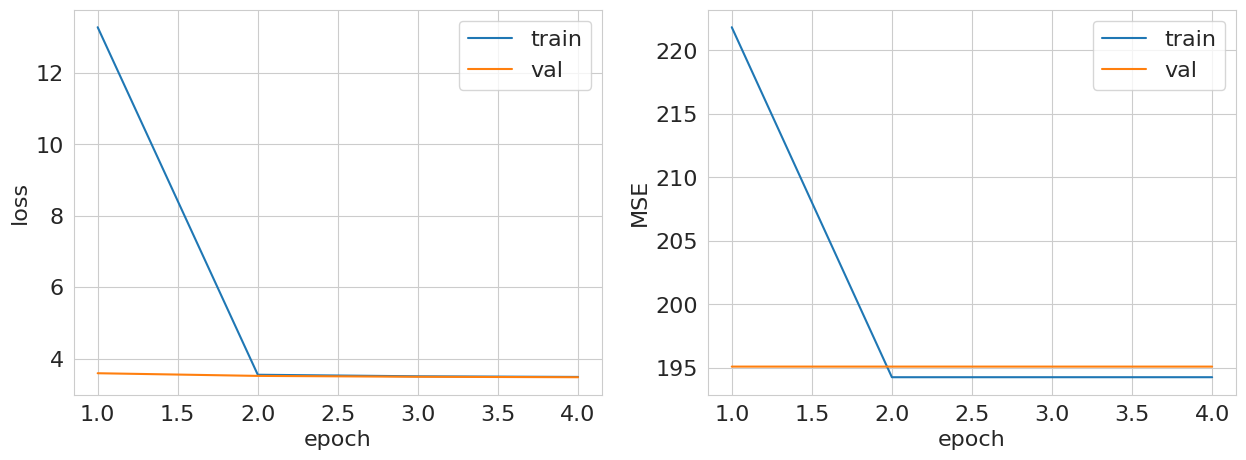

Validation MSE: 195.113


(194.27924907085475, 195.11262897553556)

In [198]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.CrossEntropyLoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [199]:
preds = get_predictions(model, val_for_check, t = 'Class')

print(MSE(y_val, decode(preds)))

195.11262897533817


In [200]:
pd.Series(decode(preds)).value_counts()

2007    96622
1998        3
2004        1
2006        1
Name: count, dtype: int64

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Бейзлайн даже в виде эврестической модели не удалось. Судя по всему модель просто выдает наиболее часто встречающийся класс в виде 2007 года. Вероятно дело в том, что классов слишком много и в них присутствует дисбаланс. Также вероятно, что проблема в том, что год это величина с порядком, а не категориальная величина.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [203]:
batch_size = 32
epochs = 4

y_train_tensor = torch.from_numpy(y_train).float().reshape(-1, 1)
y_val_tensor = torch.from_numpy(y_val).float().reshape(-1, 1)

train_dataset = TensorDataset(X_train_tesnsor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_for_check = DataLoader(val_dataset, batch_size=batch_size, num_workers=6)

metric = lambda preds, y_true: ((preds - y_true) ** 2).mean()

In [204]:
model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(lr=1e-9, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
)

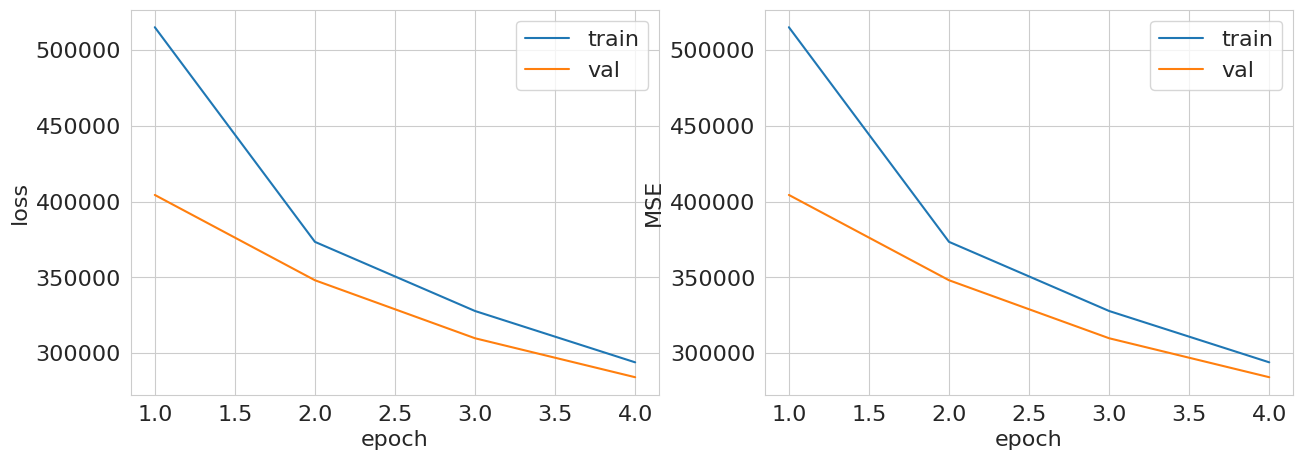

Validation MSE: 284131.313


(293959.03320257924, 284131.3133499177)

In [205]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [206]:
preds = get_predictions(model, val_for_check).reshape(-1)

print(MSE(y_val, preds))

284131.3125


In [207]:
pd.Series(preds).describe()

count    96627.000000
mean      1772.995972
std        483.285309
min        -21.299328
25%       1450.686890
50%       1727.499390
75%       2041.427490
max       7482.540039
dtype: float64

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Обучение относительно удалось стабилизировать, так как по графикам видно, что метрика MSE снижается. Однако на текущий момент метрики сами по себе хуже даже, чем у классификации, но зато видно, что это не просто наиболее частое значени, а действительно разные значения, а значит есть свет в конце тонеля. Меньшие значения `lr` помогли и позволили избежать взрыва градиента во время обучения. Для обучения также не использовались закодированные года, так как было сложно оценить метрики качества обратным преобразованием из-за того, что регрессия для кодировщика выдает неизвестные значения.

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1,1))

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    sample_normalized = scaler.transform(sample.reshape(-1,1))
    
    return sample_normalized


def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    sample_denormalized = scaler.inverse_transform(sample)
    
    return sample_denormalized

In [115]:
batch_size = 32
epochs = 8

X_train_tesnsor = torch.from_numpy(X_train).float()
X_val_tensor = torch.from_numpy(X_val).float()

y_train_tesnsor = torch.from_numpy(normalize(y_train)).float()
y_val_tensor = torch.from_numpy(normalize(y_val)).float()

train_dataset = TensorDataset(X_train_tesnsor, y_train_tesnsor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_for_check = DataLoader(val_dataset, batch_size=batch_size, num_workers=6)

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [119]:
model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(lr=1e-5, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
  (3): Sigmoid()
)

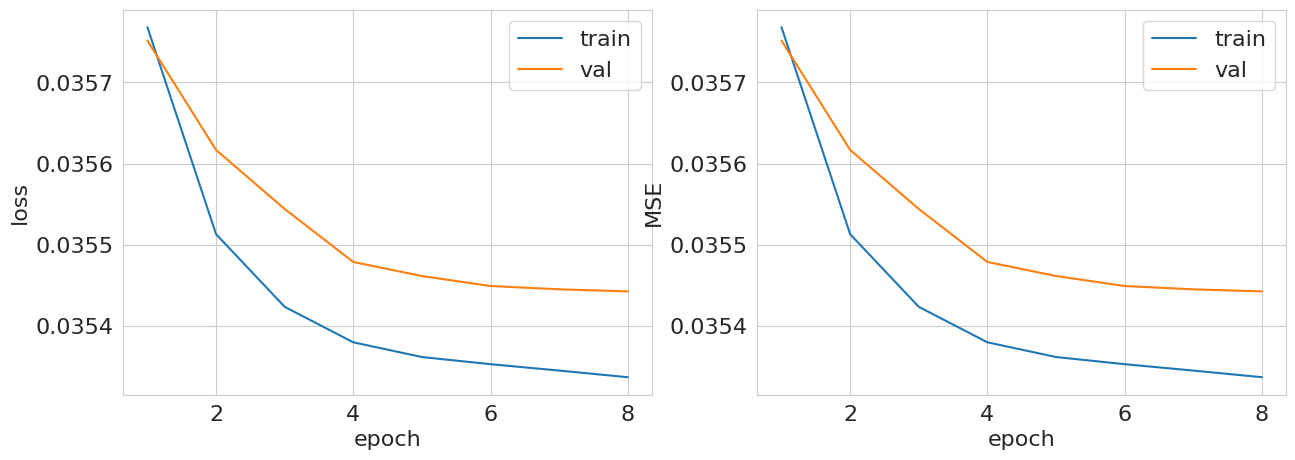

Validation MSE: 0.035


(0.03533691097624565, 0.03544255840590766)

In [120]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [121]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

280.7374572753906


In [122]:
preds

array([2010.9999, 2010.9999, 2010.9999, ..., 2010.9999, 2010.9999,
       2010.9999], dtype=float32)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** Результаты нейросети после применения `MinMaxScaler` на целевой переменной действительно улушились и улучшение очень значительное. Примерно в 1000 раз. Однако для эврестической модели результат до сих пор не дотягивает.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [214]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_train_s = scaler2.fit_transform(X_train)
X_val_s = scaler2.transform(X_val)
X_test_s = scaler2.transform(X_test)


In [215]:
batch_size = 32
epochs = 10

X_train_tesnsor = torch.from_numpy(X_train_s).float()
X_val_tensor = torch.from_numpy(X_val_s).float()

y_train_tesnsor = torch.from_numpy(normalize(y_train)).float()
y_val_tensor = torch.from_numpy(normalize(y_val)).float()

train_dataset = TensorDataset(X_train_tesnsor, y_train_tesnsor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_for_check = DataLoader(val_dataset, batch_size=batch_size, num_workers=6)

In [126]:
model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(lr=1e-3, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
  (3): Sigmoid()
)

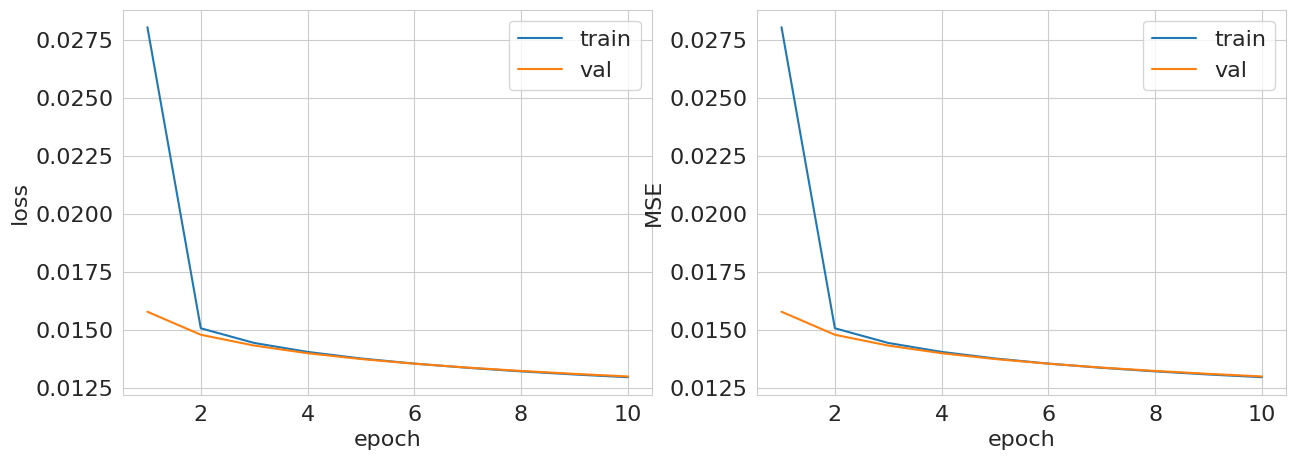

Validation MSE: 0.013


(0.01297038941930458, 0.013003786234965321)

In [127]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [128]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

103.00298309326172


In [129]:
preds

array([2002.5779, 2000.9733, 1997.6719, ..., 1997.8975, 1992.6487,
       1997.4663], dtype=float32)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

In [130]:
batch_size = 32
epochs = 10

X_train_tesnsor = torch.from_numpy(X_train_s).float()
X_val_tensor = torch.from_numpy(X_val_s).float()

y_train_tesnsor = torch.from_numpy(normalize(y_train)).float()
y_val_tensor = torch.from_numpy(normalize(y_val)).float()


train_dataset = TensorDataset(X_train_tesnsor, y_train_tesnsor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
val_for_check = DataLoader(val_dataset, batch_size=batch_size, num_workers=6)

metric = lambda preds, y_true: ((preds - y_true) ** 2).mean()

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

#### SGD + momentum

In [131]:
model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(lr=1e-2, params=model.parameters(), momentum=0.7)

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
  (3): Sigmoid()
)

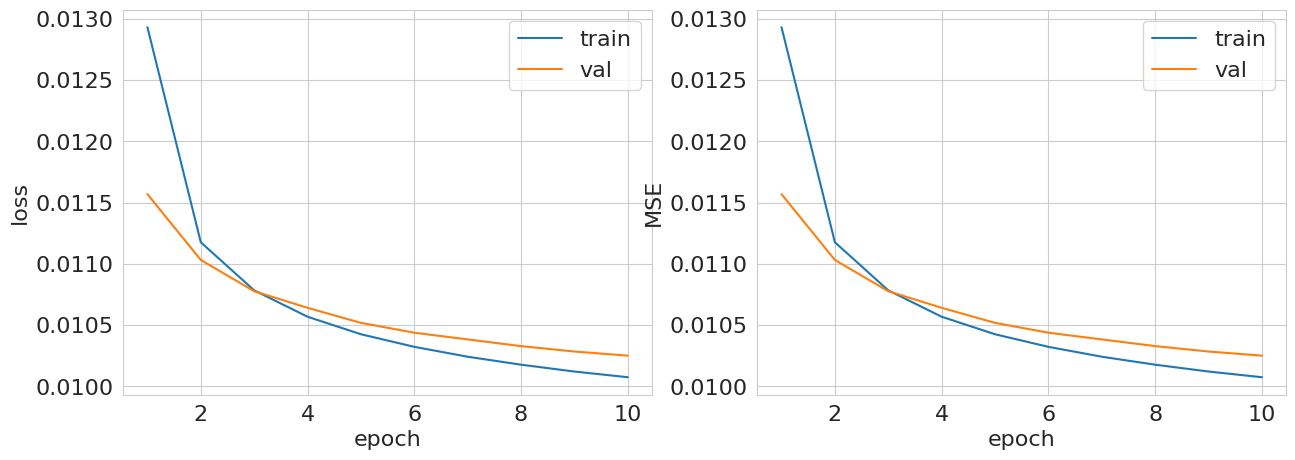

Validation MSE: 0.010


(0.010075422789756714, 0.01025133355521697)

In [133]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [134]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

81.2008056640625


Как можно заметить по графикам обучения и валидации SGD с использованием `momentum = 0.7` справился куда лучше стандартного SGD. По графикам видно, что ошибка снижается быстрее и MSE наконец побил бейзлайн в виде `Ridge` регрессии, а модель уже не просто сопоставима с ней.

#### Adam

In [135]:
model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.Adam(lr=1e-3, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
  (3): Sigmoid()
)

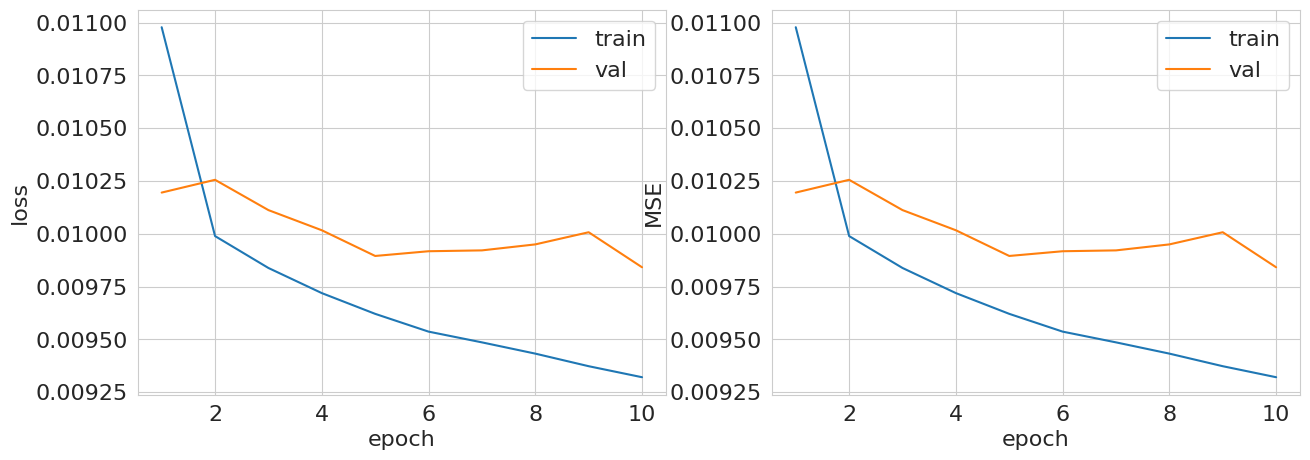

Validation MSE: 0.010


(0.009320938605110867, 0.009841559280518478)

In [136]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [137]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

77.95498657226562


В плане метрик оптимизатор Adam показал себя еще лучше с точки зрения метрик MSE. Она была снижена на 4% по сравнению с SGD с `momentum = 0.7`. Однако видно, что график обучения скачет по метрикам относительно валидации. Вероятно это связано с особенностями данного оптимизатора. Для дальнейших экспериментов вероятно стоит использовать именно его.

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

#### Увеличение размерности скрытогого слоя вдвое

In [138]:
model = nn.Sequential(
    nn.Linear(90, 256),
    nn.ReLU(),
    nn.Linear(256, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.Adam(lr=1e-3, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1, bias=True)
  (3): Sigmoid()
)

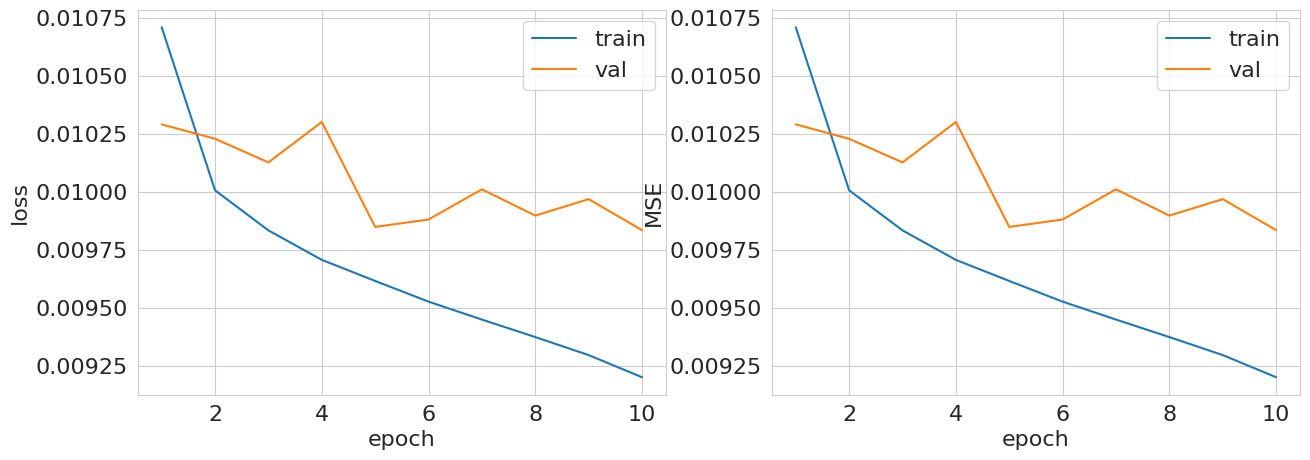

Validation MSE: 0.010


(0.00919999066788768, 0.009834457766599705)

In [139]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [140]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

77.89873504638672


Увеличение размерности слоя незначительно снизило метрику MSE, но уж очень не значительно. Вероятно это просто погрешность. Также видно, что модель потихоньку начала переобучаться на тренировочной выборке судя по графикам.

#### Увеличение глубины

In [141]:
model = nn.Sequential(
    nn.Linear(90, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.Adam(lr=1e-3, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
  (5): Sigmoid()
)

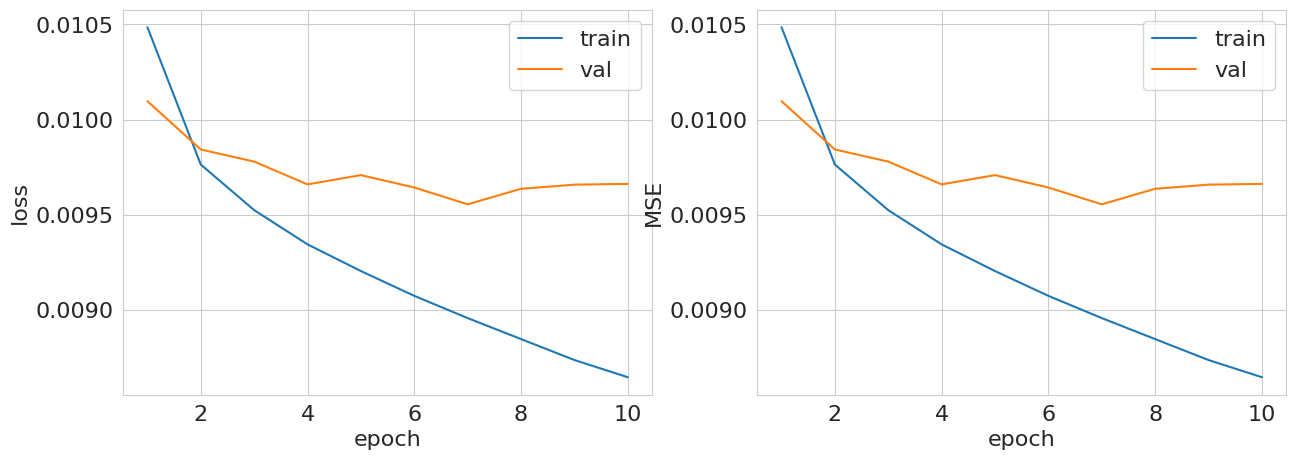

Validation MSE: 0.010


(0.008648325843825697, 0.009662597796454264)

In [142]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [143]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

76.53744506835938


Добавление еще одного слоя привело к небольшому снижению метрики MSE. Также видно, что модель стала еще более стремительно переобучаться.

#### Все вместе

In [144]:
model = nn.Sequential(
    nn.Linear(90, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.Adam(lr=1e-3, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=1, bias=True)
  (5): Sigmoid()
)

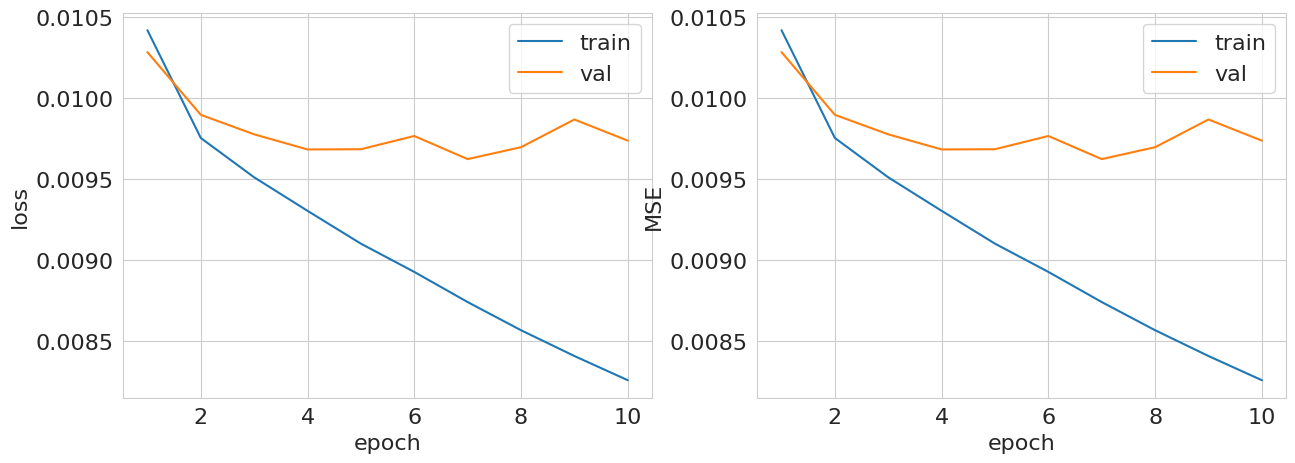

Validation MSE: 0.010


(0.008260535427320546, 0.00973827262739173)

In [145]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [146]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

77.13684844970703


Увеличение размерности скрытого слоя и добавление глубины дали свои плоды в виде слегка снизившегося MSE и очень сильного переобучения.

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

In [147]:
model = nn.Sequential(
    nn.Linear(90, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.Adam(lr=1e-3, params=model.parameters())

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=1, bias=True)
  (7): Sigmoid()
)

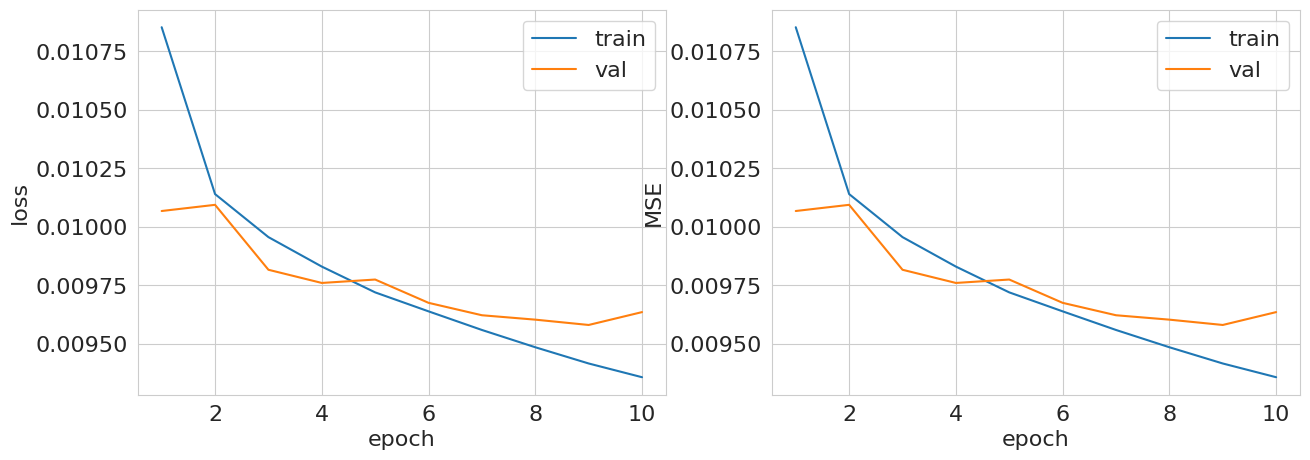

Validation MSE: 0.010


(0.009357352815913884, 0.009635663586438652)

In [148]:
train_and_validate(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,
    val_loader = val_dataloader,
    num_epochs = epochs,
    verbose=True,
)

In [149]:
preds = denormalize(get_predictions(model, val_for_check)).reshape(-1)
print(MSE(y_val, preds))

76.32408905029297


После добавления `nn.Dropout(0.2)` в модифицированную модель, видно, что модель не переобучается слишком сильно под тренировочные данные, а также видно, что метрика MSE чуть снизилась по сравнению с добавлением просто линейного слоя без регуляризации, что довольно хорошо, если учитывать то, как проявила себя эта модификациия модели без `nn.Dropout(0.2)`.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

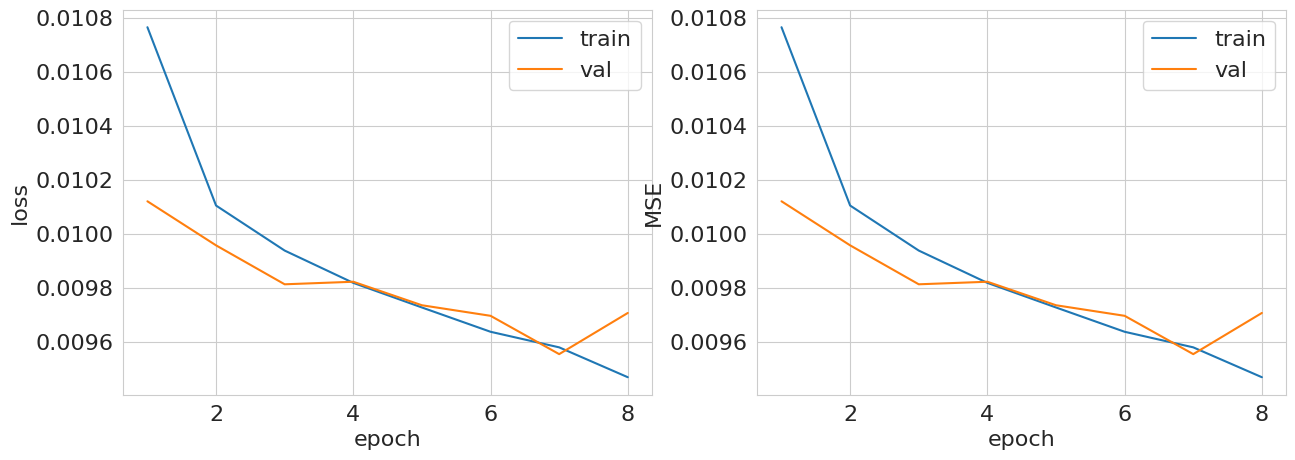

Training 9/10:   0%|          | 0/9059 [00:00<?, ?it/s]

In [ ]:
lr_data = pd.DataFrame(columns=['MSE_train', 'MSE_val', 'learning_rate'])
for i in [1e-6, 1e-5, 1e-4, 1e-3]:
    model = nn.Sequential(
        nn.Linear(90, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 1),
        nn.Sigmoid()
    )

    optimizer = torch.optim.Adam(lr=i, params=model.parameters())

    model.to(device)


    t, v = train_and_validate(
        model = model,
        optimizer = optimizer,
        criterion = nn.MSELoss(),
        metric = metric,
        train_loader = train_dataloader,
        val_loader = val_dataloader,
        num_epochs = epochs,
        verbose=True,
    )

    lr_data.loc[len(lr_data)] = [t, v, i]

In [208]:
lr_data

,MSE_train,MSE_val,learning_rate
0,0.012599,0.012239,0.000001
1,0.010597,0.010332,0.000010
2,0.009364,0.009560,0.000100
3,0.009360,0.009685,0.001000


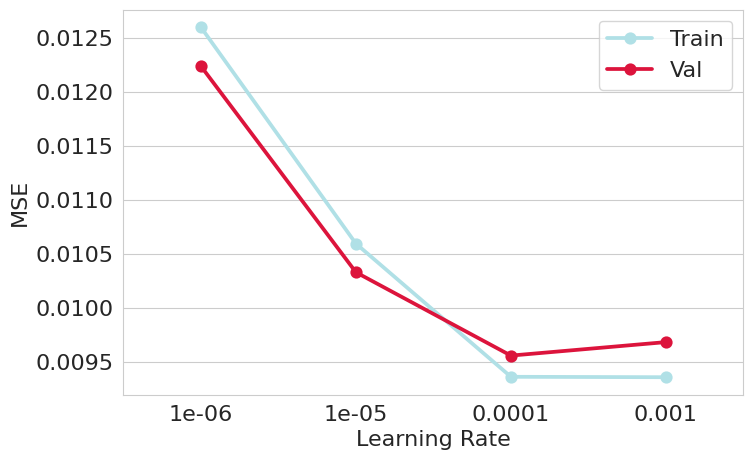

In [186]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.pointplot(data=lr_data, y='MSE_train', x='learning_rate', color='powderblue', label='Train')
sns.pointplot(data=lr_data, y='MSE_val', x='learning_rate', color='crimson', label='Val')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.legend()

plt.show()

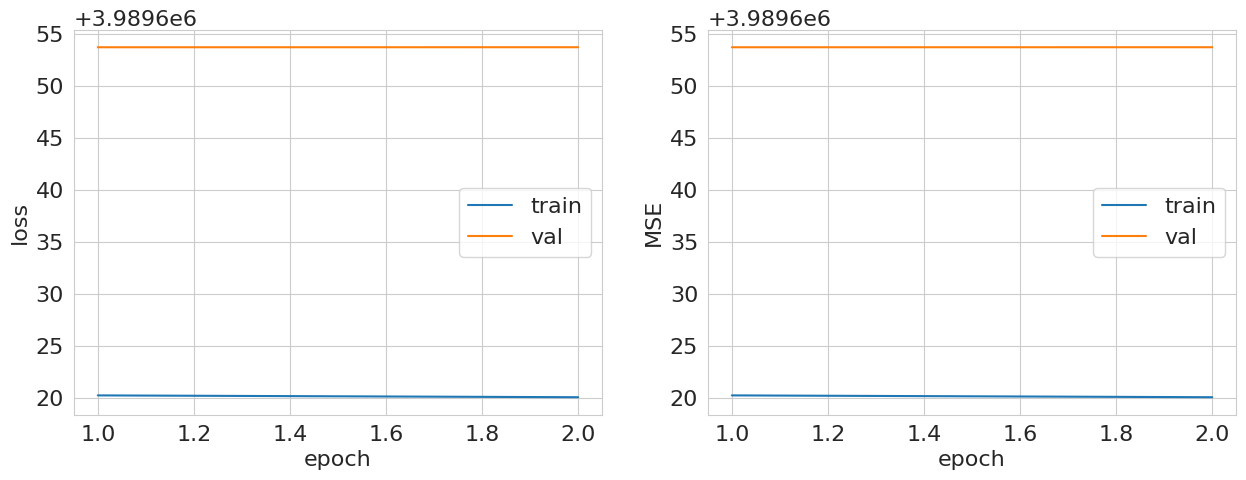

Training 3/4:   0%|          | 0/9059 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [209]:
wd_data = pd.DataFrame(columns=['MSE_train', 'MSE_val', 'weight_decay'])
for i in [0.0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]:
    model = nn.Sequential(
        nn.Linear(90, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 1),
        nn.Sigmoid()
    )

    optimizer = torch.optim.Adam(lr=1e-4, params=model.parameters(), weight_decay = i)

    model.to(device)


    t, v = train_and_validate(
        model = model,
        optimizer = optimizer,
        criterion = nn.MSELoss(),
        metric = metric,
        train_loader = train_dataloader,
        val_loader = val_dataloader,
        num_epochs = epochs,
        verbose=True,
    )

    wd_data.loc[len(wd_data)] = [t, v, i]

In [ ]:
lr_data

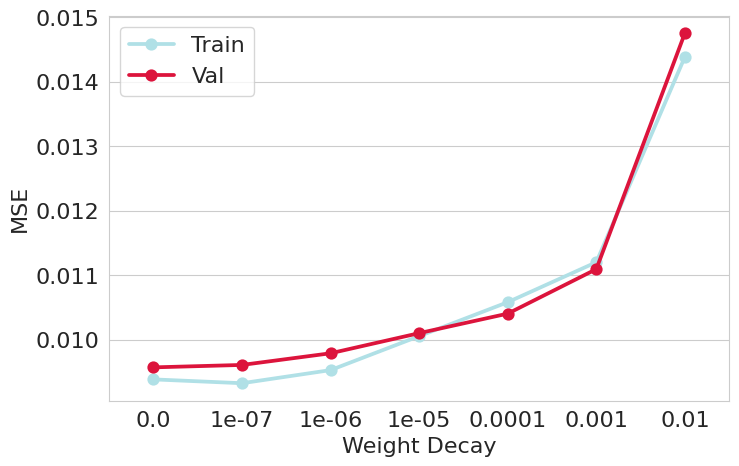

In [187]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.pointplot(data=wd_data, y='MSE_train', x='weight_decay', color='powderblue', label='Train')
sns.pointplot(data=wd_data, y='MSE_val', x='weight_decay', color='crimson', label='Val')
plt.xlabel('Weight Decay')
plt.ylabel('MSE')
plt.legend()

plt.show()


Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [165]:
def train_only(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    num_epochs,
    verbose=True,
):
    """
    Train a neural network only (no validation).
      - model: neural network to train
      - optimizer: optimizer for the model
      - criterion: loss function
      - metric: function to evaluate the model (e.g. MSE)
      - train_loader: DataLoader with train set
      - num_epochs: number of epochs to train
      - verbose: whether to print progress
    Returns:
      - train_mse: training MSE over the last epoch
    """
    train_losses, train_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}") if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            X = X_batch.to(device)
            y = y_batch.to(device)

            predictions = model(X)
            loss = criterion(predictions, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad(set_to_none=True)

            with torch.no_grad():
                metric_value = metric(predictions, y)
                if isinstance(metric_value, torch.Tensor):
                    metric_value = metric_value.item()
                running_loss += loss.item() * X.size(0)
                running_metric += metric_value * X.size(0)

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_metric = running_metric / len(train_loader.dataset)

        train_losses.append(epoch_loss)
        train_metrics.append(epoch_metric)

        if verbose:
            print(f"Epoch {epoch} - Loss: {epoch_loss:.4f}, MSE: {epoch_metric:.4f}")

    return train_metrics[-1]

Данная функция это просто модификация функции, которую я доделывал в первом задании. Однако ту я делел сам, а эту чат помог немного сделать.

In [166]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

In [167]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1,1))

MinMaxScaler()

In [168]:
scaler2 = StandardScaler()
X_train_s = scaler2.fit_transform(X_train)
X_test_s = scaler2.transform(X_test)

In [169]:
batch_size = 32
epochs = 10

X_train_tesnsor = torch.from_numpy(X_train_s).float()

y_train_tesnsor = torch.from_numpy(normalize(y_train)).float()

X_test_tensor = torch.from_numpy(X_test_s).float()
y_test_tensor = torch.from_numpy(normalize(y_test)).float()

train_dataset = TensorDataset(X_train_tesnsor, y_train_tesnsor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=6, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=6)

metric = lambda preds, y_true: ((preds - y_true) ** 2).mean()

In [170]:
model = nn.Sequential(
    nn.Linear(90, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(lr=1e-3, params=model.parameters(), weight_decay=0.0)

model.to(device)

Sequential(
  (0): Linear(in_features=90, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=1, bias=True)
  (7): Sigmoid()
)

In [171]:
train_only(
    model = model,
    optimizer = optimizer,
    criterion = nn.MSELoss(),
    metric = metric,
    train_loader = train_dataloader,

    num_epochs = epochs,
    verbose=True,
)

Training 1/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 1 - Loss: 0.0108, MSE: 0.0108


Training 2/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 2 - Loss: 0.0101, MSE: 0.0101


Training 3/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 3 - Loss: 0.0099, MSE: 0.0099


Training 4/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 4 - Loss: 0.0098, MSE: 0.0098


Training 5/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 5 - Loss: 0.0097, MSE: 0.0097


Training 6/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 6 - Loss: 0.0096, MSE: 0.0096


Training 7/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 7 - Loss: 0.0096, MSE: 0.0096


Training 8/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 8 - Loss: 0.0095, MSE: 0.0095


Training 9/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 9 - Loss: 0.0094, MSE: 0.0094


Training 10/10:   0%|          | 0/12079 [00:00<?, ?it/s]

Epoch 10 - Loss: 0.0094, MSE: 0.0094


0.009391406916536988

In [172]:
preds = denormalize(get_predictions(model, test_dataloader)).reshape(-1)
print(MSE(y_test, preds))

75.58870697021484
